<a href="https://colab.research.google.com/github/joydata2023/github_colab_project/blob/main/Project1_bicycle_retention_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis

# Importing Libraries


# libarary

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

#import missingno as msno
#from textwrap import wrap

# Data loading and cleaning

In [2]:
# Loading dataset from google drive
transaction_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', 'Transactions', header=1)
# view transaction dataset
transaction_df.head()




,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [3]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
# import customer demographic dataset and view
customer_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', 'CustomerDemographic')
customer_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,NaT,124,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaT,124,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaT,124,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaT,124,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaT,124,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3912 non-null   datetime64[ns]
 5   age                                  4000 non-null   int64         
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [6]:
# import customer address dataset and View
address_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerAddress',header=1)
address_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [7]:
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [8]:
# combine all above datasets
df=transaction_df.merge(customer_df, how='left', on='customer_id').merge(address_df, how='left', on='customer_id')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196.0,NSW,Australia,5.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Retail,Affluent Customer,N,No,22.0,586 Miller Parkway,2835.0,NSW,Australia,1.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,N,No,16.0,1617 Harper Parkway,2096.0,NSW,Australia,10.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Retail,Affluent Customer,N,Yes,2.0,0601 Stephen Place,2292.0,NSW,Australia,7.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  int64         
 1   product_id                           20000 non-null  int64         
 2   customer_id                          20000 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         19640 non-null  float64       
 5   order_status                         20000 non-null  object        
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price

In [11]:
df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date,past_3_years_bike_related_purchases,DOB,age,tenure,postcode,property_valuation
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000.000000,19803.000000,19803,19997.000000,19542,19997.000000,19551.000000,19968.000000,19968.000000
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,1107.829449,556.046951,2004-07-31 18:38:13.834267392,48.772466,1977-08-22 05:25:37.488486336,47.987748,10.683239,2987.623347,7.516376
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,1991-01-21 00:00:00,0.000000,1931-10-23 00:00:00,22.000000,1.000000,2000.000000,1.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,1997-08-25 00:00:00,24.000000,1968-04-20 00:00:00,37.000000,6.000000,2200.000000,6.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,2004-08-17 00:00:00,48.000000,1977-09-01 12:00:00,46.000000,11.000000,2767.000000,8.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,2011-05-09 00:00:00,73.000000,1987-04-10 12:00:00,57.000000,15.000000,3754.000000,10.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,2016-12-06 00:00:00,99.000000,2002-03-11 00:00:00,124.000000,22.000000,4883.000000,12.000000
std,5773.647028,30.75359,1011.951046,NaN,0.500013,582.825242,405.955660,NaN,28.598250,NaN,17.030558,5.676403,851.306647,2.824783


In [12]:
# inspect the missing values
print(df.isnull().values.sum())
# replace the ''s with NaN
df = df.replace([" ","#NUM!","1843-12-21"],np.NaN)
df['age'].head()
# for numeric missing values, impute the missing values with mean impution
#df = df.fillna(df.mean(numeric_only=True))
# count the number of NaNs in the dataset to verify
#print(df.isnull().values.sum())

8259


0    69.0
1    45.0
2    46.0
3    62.0
4    27.0
Name: age, dtype: float64

# EDA - Transaction table merge customer table - dist - strip - rel - heatmap......

## Data Cleaning - Checking and working with missing value

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  int64         
 1   product_id                           20000 non-null  int64         
 2   customer_id                          20000 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         19640 non-null  float64       
 5   order_status                         20000 non-null  object        
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price

### numerical variables

To analyze each column and replace missing values

<Axes: >

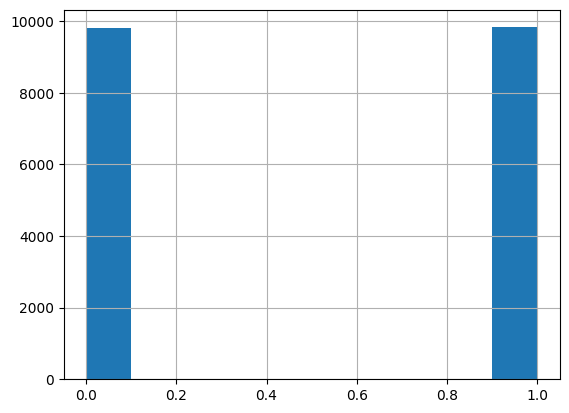

In [14]:
df['online_order'].hist()

From the above figure, we can find that there are 2 values, 0 and 1. 0 means not online_order, while 1 means online_order. I will pick the most frequent value to replace missing values.

In [15]:
df['online_order'] = df['online_order'].fillna(df['online_order'].value_counts().index[0])
df['online_order'].isnull().values.sum()

0

<Axes: >

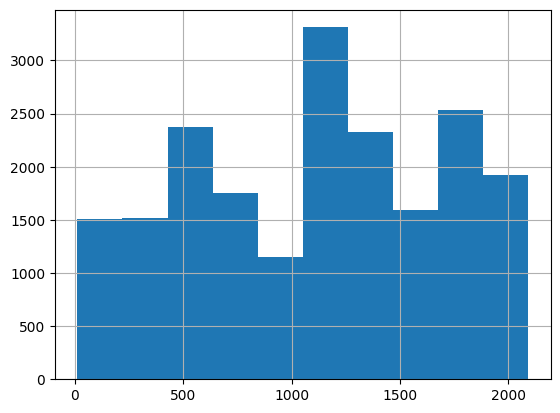

In [16]:
df['list_price'].hist()
# From the graph, we can see that the highest frequency appears at the range from 1000 to 1500.

<Axes: >

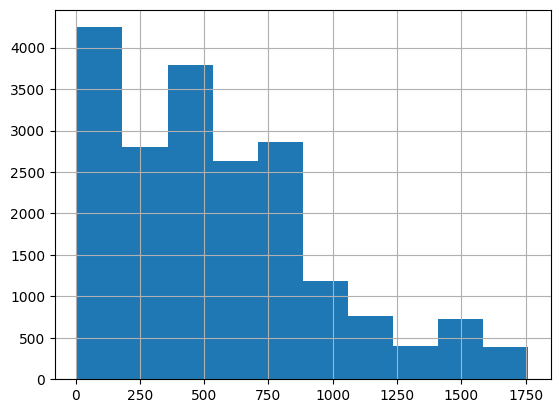

In [17]:
# view the distribution
df['standard_cost'].hist()

In [19]:
# it looks right-skewed（the tail is on the right）, so I will pick median to replace missing value
df['standard_cost'] = df['standard_cost'].fillna(df['standard_cost'].median())
# check the missing value
df['standard_cost'].isnull().values.sum()

0

<Axes: >

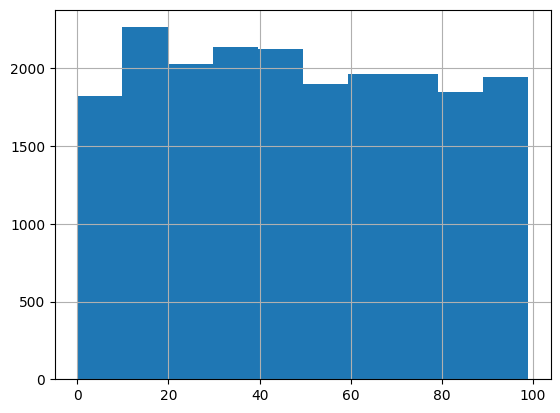

In [20]:
# view the distribution
df['past_3_years_bike_related_purchases'].hist()

In [21]:
# There are 3 missing value, I will select '0' to replace missing value.
df['past_3_years_bike_related_purchases'] = df['past_3_years_bike_related_purchases'].fillna(0)
df['past_3_years_bike_related_purchases'].isnull().values.sum()

0

<Axes: >

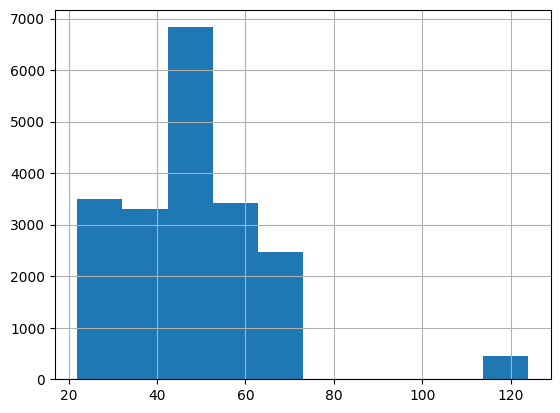

In [22]:
# view the distribution of age
df['age'].hist()

In [23]:
# we can easily find that there are some outliers around 120, which doesn't make sense. I will consider these outliers as 'NaN' and replace missing values with mean
df['age'] = df['age'].apply(lambda x: np.NaN if x>100 else x)
df['age'] = df['age'].fillna(df['age'].mean())
df['age'].isnull().values.sum()

0

In [24]:
df['age'].describe()

count    20000.000000
mean        46.217941
std         12.469275
min         22.000000
25%         37.000000
50%         46.000000
75%         55.000000
max         92.000000
Name: age, dtype: float64

0

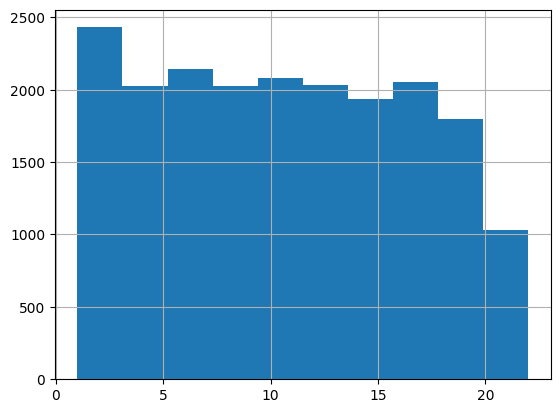

In [25]:
# I will use '0' to replace missing value
df['tenure'].hist()
df['tenure'] = df['tenure'].fillna('0')
df['tenure'].isnull().values.sum()

In [26]:
# for missing values in postcode, I will fill them with '0'
df['postcode'] = df['postcode'].fillna(0)
df['postcode'].isnull().values.sum()

0

In [27]:
# for missing values in property_valuation, I also choose '0' to replace them.
df['property_valuation'] = df['property_valuation'].fillna(0)
df['property_valuation'].isnull().values.sum()

0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  int64         
 1   product_id                           20000 non-null  int64         
 2   customer_id                          20000 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         20000 non-null  float64       
 5   order_status                         20000 non-null  object        
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price

### Replace Categorical Variables missing values

In [29]:
 # check unique variables in each categorical column
for col in df.columns:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        # Impute with the most frequent value
        print(col,df[col].unique())


order_status ['Approved' 'Cancelled']
brand ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
product_line ['Standard' 'Road' 'Mountain' 'Touring' nan]
product_class ['medium' 'low' 'high' nan]
product_size ['medium' 'large' 'small' nan]
name ['Kristos Anthony' "Lauree O'Donnell" 'Berne Donegan' ... 'Raddy Delete'
 'Violetta Bucksey' 'Gard Tidy']
gender ['Male' 'Female' 'U' nan]
job_title ['Software Engineer I' 'Clinical Specialist' 'Desktop Support Technician'
 'Staff Scientist' nan 'Web Designer II' 'Food Chemist' 'Quality Engineer'
 'Executive Secretary' 'Product Engineer' 'Sales Representative'
 'Research Assistant II' 'Registered Nurse' 'Staff Accountant II'
 'Assistant Manager' 'Accountant IV' 'Pharmacist' 'Paralegal'
 'Office Assistant III' 'VP Marketing' 'Analog Circuit Design manager'
 'Help Desk Operator' 'Professor' 'Assistant Professor'
 'Occupational Therapist' 'Statistician II' 'Technical Writer'
 'Statistician IV' 'Software Engineer

In [30]:
# replace missing values in each categorical column
for col in df.columns:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        # Impute with the most frequent value
       df[col] = df[col].fillna(df[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(df.isnull().values.sum())


655


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  int64         
 1   product_id                           20000 non-null  int64         
 2   customer_id                          20000 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         20000 non-null  float64       
 5   order_status                         20000 non-null  object        
 6   brand                                20000 non-null  object        
 7   product_line                         20000 non-null  object        
 8   product_class                        20000 non-null  object        
 9   product_size                         20000 non-null  object        
 10  list_price

### visualize categorical and numeric variables

<Axes: xlabel='brand', ylabel='list_price'>

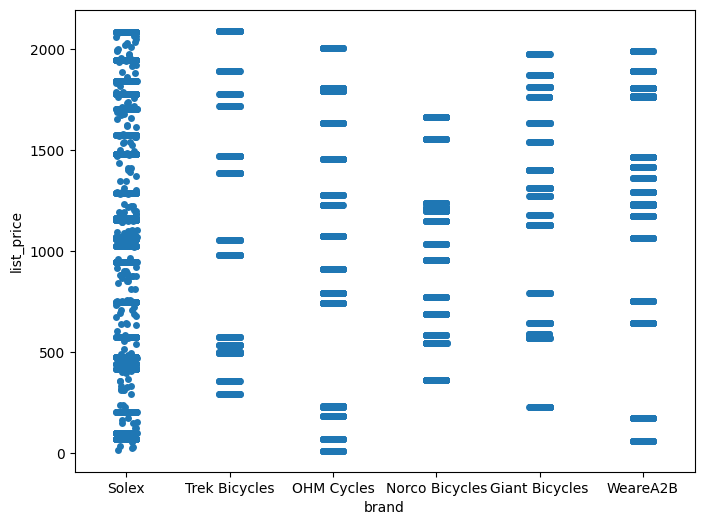

In [33]:
# to analyze the relationship between 'brand' and 'list_price'
plt.figure(figsize=(8,6))

sns.stripplot(x='brand',y='list_price',data=df,jitter=True)

we can find that the brand of Solex has the highest number, which means customers spend the most money on Solex products.

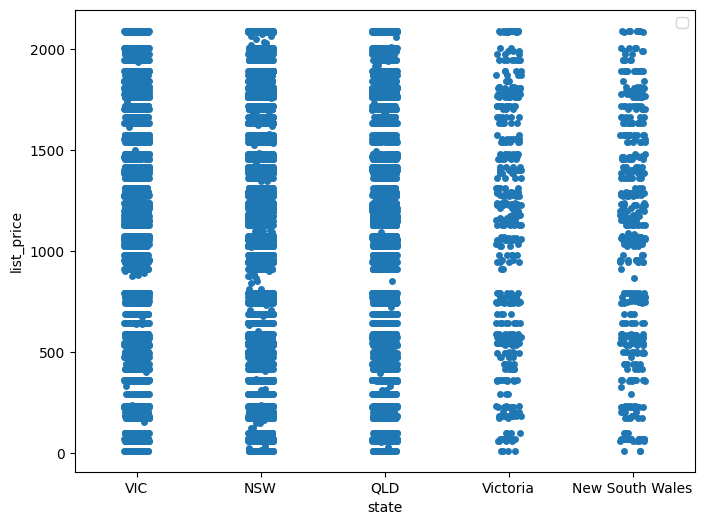

In [34]:
plt.figure(figsize=(8,6))
sns.stripplot(x='state',y='list_price',data=df)
plt.legend(loc='upper right')
# Victoria and New Sounth Wales have lower 'list_price', which means people in these two states spend less money than people in other three states.

<Axes: xlabel='gender', ylabel='list_price'>

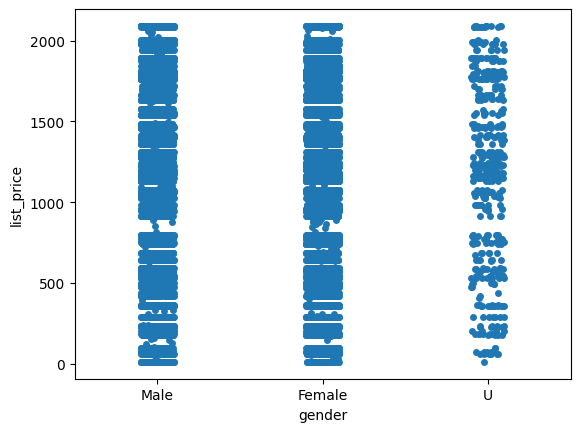

In [35]:
sns.stripplot(x='gender',y='list_price',data=df)
# It seems that gender has little impace on 'list_price'.

In [36]:
# creat 'profit' variable
df['profit'] = df['list_price']-df['standard_cost']
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196.0,NSW,Australia,5.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Affluent Customer,N,No,22.0,586 Miller Parkway,2835.0,NSW,Australia,1.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Mass Customer,N,No,16.0,1617 Harper Parkway,2096.0,NSW,Australia,10.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Affluent Customer,N,Yes,2.0,0601 Stephen Place,2292.0,NSW,Australia,7.0,1055.82


<Axes: xlabel='gender', ylabel='profit'>

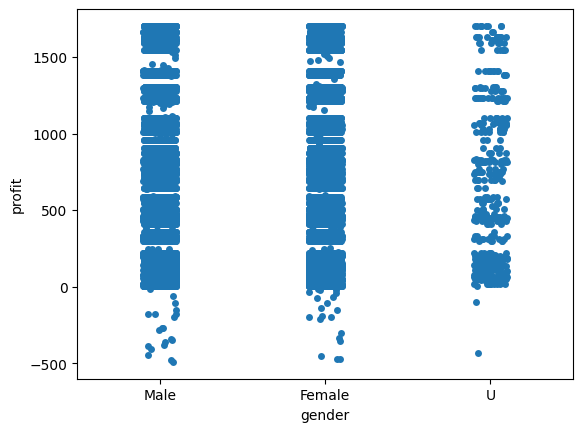

In [37]:
sns.stripplot(x='gender',y='profit',data=df)
# gender also has little impact on profit.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Solex'),
  Text(1, 0, 'Trek Bicycles'),
  Text(2, 0, 'OHM Cycles'),
  Text(3, 0, 'Norco Bicycles'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'WeareA2B')])

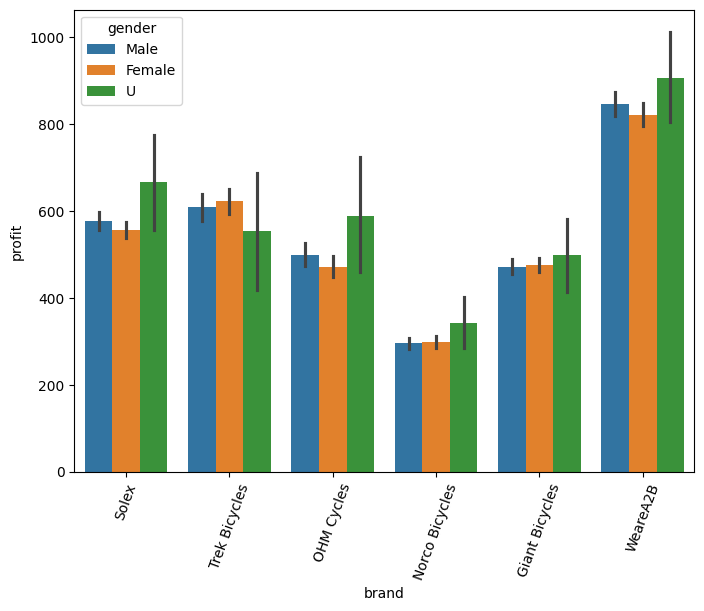

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x='brand', y='profit',hue='gender',data=df)
plt.xticks(rotation=70)
# The brand of WeareA2B is the most profitable.

In [39]:
import plotly.express as px
fig = px.pie(df, values='customer_id', names='brand')
fig.show()
# 22.1% customers purchased Solex products.

In [ ]:
# inspect the missing values
#print(df.isnull().values.sum())
# replace the ''s with NaN
#df = df.replace(" ",np.NaN)
# for numeric missing values, impute the missing values with mean impution
#df = df.fillna(df.mean(numeric_only=True))
# count the number of NaNs in the dataset to verify
#print(df.isnull().values.sum())

In [ ]:
# deal with categorical missing value
#for col in df.columns:
  # check if the column is object type
  #if df[col].dtypes == 'object':
    # impute with the most frequent value
    #df[col] = df[col].fillna(df[col].value_counts().index[0])
# count the number of NaNs
#print (df.isnull().sum())

# Assigned the cohorts and calculated the monthly offset

In [41]:
#dt.datetime(transaction_df['transaction_date'][1].year, transaction_df['transaction_date'][1].month, 1)
dt.datetime(df['transaction_date'][1].year, df['transaction_date'][1].month,1)

datetime.datetime(2017, 5, 1, 0, 0)

In [42]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x):
  return dt.datetime(x.year,x.month,1)
#create transaction_date column based on month and store in Transactionmonth
df['transactionmonth'] = df['transaction_date'].apply(get_month)
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,profit,transactionmonth
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0,17.87,2017-02-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,N,Yes,10.0,4 Shopko Circle,2196.0,NSW,Australia,5.0,1702.55,2017-05-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,N,No,22.0,586 Miller Parkway,2835.0,NSW,Australia,1.0,1544.61,2017-10-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,N,No,16.0,1617 Harper Parkway,2096.0,NSW,Australia,10.0,817.36,2017-08-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,N,Yes,2.0,0601 Stephen Place,2292.0,NSW,Australia,7.0,1055.82,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,...,N,Yes,7.0,3 Hayes Court,3109.0,VIC,Australia,10.0,802.26,2017-06-01
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,...,N,No,19.0,0 Pearson Crossing,4405.0,QLD,Australia,1.0,104.24,2017-11-01
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,...,N,No,14.0,10055 Old Shore Lane,3630.0,VIC,Australia,1.0,1592.19,2017-04-01
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,...,N,Yes,20.0,1 Wayridge Park,4301.0,QLD,Australia,1.0,91.15,2017-07-01


In [43]:
#transaction_df.groupby('customer_id')['TransactionMonth'].min()
df.groupby('customer_id')['transactionmonth'].min()

customer_id
1      2017-01-01
2      2017-05-01
3      2017-02-01
4      2017-04-01
5      2017-03-01
          ...    
3497   2017-09-01
3498   2017-02-01
3499   2017-01-01
3500   2017-01-01
5034   2017-01-01
Name: transactionmonth, Length: 3494, dtype: datetime64[ns]

In [44]:
#transaction_df.groupby('customer_id')['TransactionMonth'].transform('min')
df.groupby('customer_id')['transactionmonth'].transform('min')

0       2017-02-01
1       2017-01-01
2       2017-01-01
3       2017-02-01
4       2017-01-01
           ...    
19995   2017-01-01
19996   2017-01-01
19997   2017-04-01
19998   2017-02-01
19999   2017-03-01
Name: transactionmonth, Length: 20000, dtype: datetime64[ns]

In [45]:
# Grouping by customer_id and select the InvoiceMonth value
# Assigning a minimum InvoiceMonth value to the dataset
df['CohortMonth'] = df.groupby('customer_id')['transactionmonth'].transform('min')
# printing top 5 rows
print(df.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  ...  \
0     Approved           Solex     Standard        medium       medium  ...   
1     Approved   Trek Bicycles     Standard        medium        large  ...   
2     Approved      OHM Cycles     Standard           low       medium  ...   
3     Approved  Norco Bicycles     Standard        medium       medium  ...   
4     Approved  Giant Bicycles     Standard        medium        large  ...   

   owns_car  tenure              address postcode state    cou

## Calculating time offset in Month as Cohort Index

Calculating the time offset for each transaction allows you to evaluate the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months, and days for Transaction and Cohort Date using the get_date_int() function.

In [46]:
def get_date_int(df,column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `invoicedate` column
transaction_year, transaction_month, _= get_date_int(df, 'transactionmonth')
cohort_year, cohort_month, _ = get_date_int(df,'CohortMonth')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,owns_car,tenure,address,postcode,state,country,property_valuation,profit,transactionmonth,CohortMonth
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0,17.87,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Yes,10.0,4 Shopko Circle,2196.0,NSW,Australia,5.0,1702.55,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,No,22.0,586 Miller Parkway,2835.0,NSW,Australia,1.0,1544.61,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,No,16.0,1617 Harper Parkway,2096.0,NSW,Australia,10.0,817.36,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Yes,2.0,0601 Stephen Place,2292.0,NSW,Australia,7.0,1055.82,2017-10-01,2017-01-01


Now we will calculate the difference between the Invoice Dates and Cohort dates in years, months separately. then calculate the total Months difference between the two. This will be our month’s offset or cohort Index, which we will use in the next section to calculate the retention rate.

In [47]:
# get difference in years
years_diff = transaction_year - cohort_year
# calculate difference in months
months_diff = transaction_month - cohort_month
# added "+1 " at the end so that the first month is marked as 1 insteand of 0 for easier interpretation
df['CohortIndex'] = years_diff * 12 + months_diff + 1
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,address,postcode,state,country,property_valuation,profit,transactionmonth,CohortMonth,CohortIndex
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0,17.87,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,10.0,4 Shopko Circle,2196.0,NSW,Australia,5.0,1702.55,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,22.0,586 Miller Parkway,2835.0,NSW,Australia,1.0,1544.61,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,16.0,1617 Harper Parkway,2096.0,NSW,Australia,10.0,817.36,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,2.0,0601 Stephen Place,2292.0,NSW,Australia,7.0,1055.82,2017-10-01,2017-01-01,10



Here, at first, we create a group() object with CohortMonth and CohortIndex and store it as a grouping.

Then, we call this object, select the customer_id column and calculate the average.

Then we store the results as cohort_data. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices.

Finally, we create a pivot table bypassing

 -  CohortMonth to the index parameter,
 - CohortIndex to the columns parameter,
 - customer_id to the values parameter.

In [48]:
# Counting daily active user from each chort
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = df.groupby(['CohortMonth','CohortIndex']).nunique()['customer_id'].reset_index()
# Printing top 5 rows of Dataframe
cohort_data.head(20)

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502
5,2017-01-01,6,483
6,2017-01-01,7,518
7,2017-01-01,8,529
8,2017-01-01,9,500
9,2017-01-01,10,531


# Calculate business metrics: Retention rate

**The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.**

In this section, we will calculate the retention count for each cohort Month paired with cohort Index

Now that we have a count of the retained customers for each cohortMonth and cohortIndex. We will calculate the retention rate for each Cohort.

We will create a pivot table for this purpose.

In [49]:
cohort_data.pivot(index='CohortMonth',columns='CohortIndex', values='customer_id')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values = 'customer_id')
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention rate dataframe represents Customer retained across Cohorts. We can read it as follows:

Index value represents the Cohort
Columns represent the number of months since the current Cohort
For instance: The value at CohortMonth 2017-01-01, CohortIndex 3 is 35.9 and represents 35.9% of customers from cohort 2017-01 were retained in the 3rd Month.
Also, you can see from the retention Rate DataFrame:

- Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customer signed up in 1st Month
- The retention rate may increase or decrease in subsequent Indexes.
- Values towards the bottom right have a lot of NaN values.

#Visualizing the retention rate
# Before we starting plotting our heatmap, let’s set the index of our Retention rate dataframe to a more readable string format.

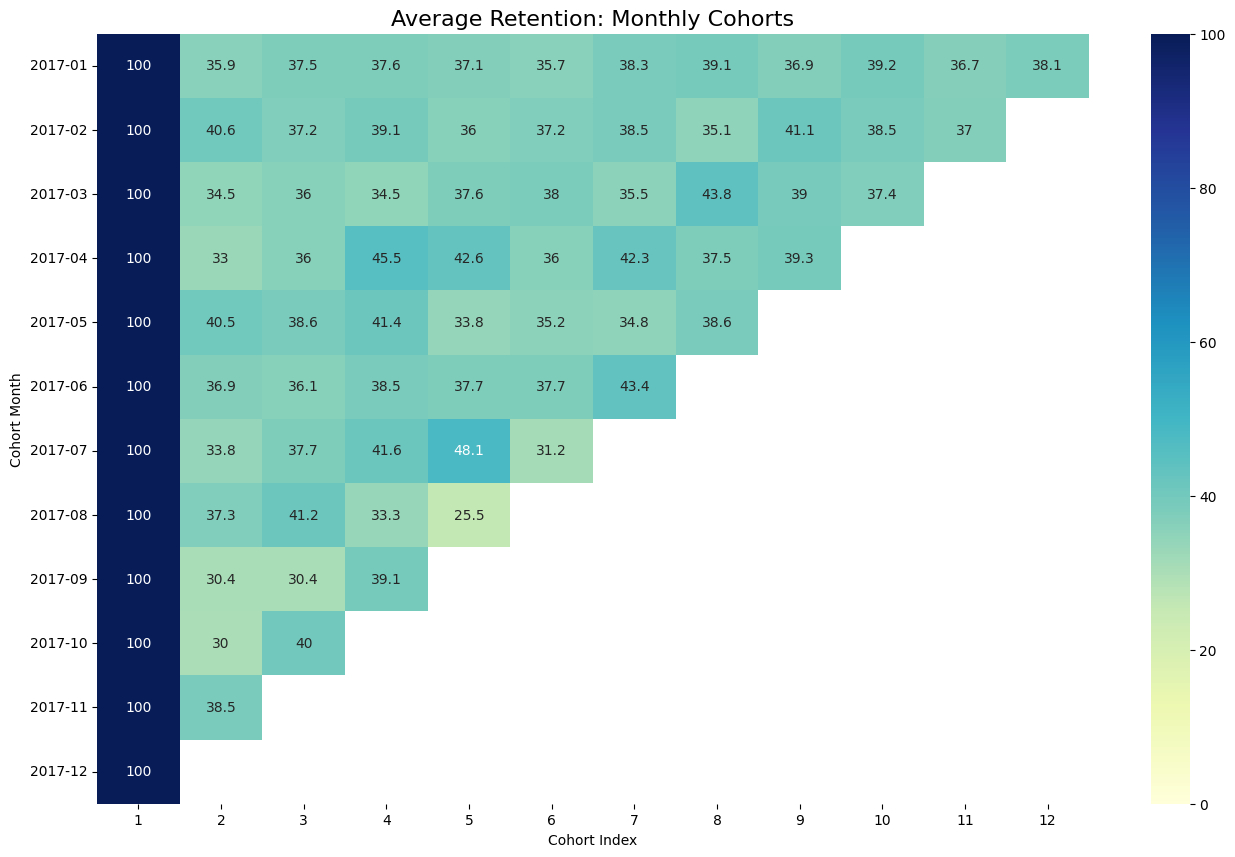

In [51]:
retention = retention.round(3)*100
retention.index = retention.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16,10))
# adding a title
plt.title('Average Retention: Monthly Cohorts', fontsize=16)
# creating heatmap
sns.heatmap(retention, annot=True, vmin=0.0, vmax=100, cmap='YlGnBu',fmt='g')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.yticks( rotation='horizontal')
plt.show()

In [52]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

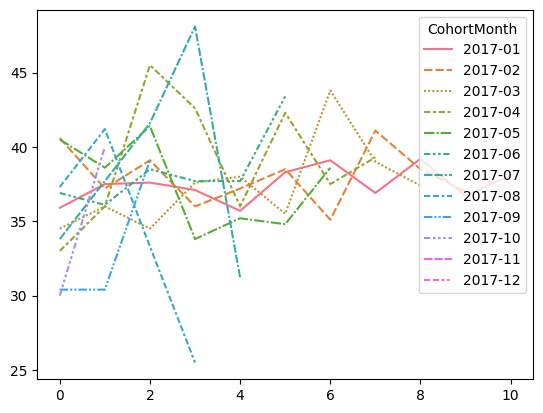

In [83]:
retention_t = retention.transpose()

retention_t = retention_t.drop([1]).reset_index(drop=True)
retention_t
sns.lineplot(data = retention_t)

## Interpreting the retention rate
The most effective way to visualize and analyze cohort analysis data is through a heatmap, as we did above. It provides both the actual metric values and the color-coding to see the differences in the numbers visually.

In [ ]:
# we can find that the biggest dropoff is from 48.1 to 31.2, about 15 percentage points
df_48 = df[(df['CohortMonth'] == '2017-07-01') & (df['CohortIndex'] ==5)]
df_31 = df[(df['CohortMonth'] == '2017-07-01') & (df['CohortIndex'] ==6)]


In [ ]:
df_48.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,address,postcode,state,country,property_valuation,profit,transactionmonth,CohortMonth,CohortIndex
1750,1751,22,2730,2017-11-21,0.0,Approved,WeareA2B,Standard,medium,medium,...,11.0,63 International Drive,4165.0,QLD,Australia,7.0,15.08,2017-11-01,2017-07-01,5
2160,2161,98,2694,2017-11-22,0.0,Approved,Trek Bicycles,Standard,high,medium,...,6.0,99565 Warrior Alley,4510.0,QLD,Australia,3.0,143.36,2017-11-01,2017-07-01,5
2561,2562,35,2514,2017-11-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,17.0,6 Hoard Plaza,3111.0,VIC,Australia,10.0,448.68,2017-11-01,2017-07-01,5
3035,3036,27,2730,2017-11-21,0.0,Approved,Trek Bicycles,Standard,medium,medium,...,11.0,63 International Drive,4165.0,QLD,Australia,7.0,110.81,2017-11-01,2017-07-01,5
3397,3398,51,1809,2017-11-20,0.0,Approved,OHM Cycles,Standard,high,medium,...,19.0,7 Erie Court,2263.0,NSW,Australia,7.0,802.26,2017-11-01,2017-07-01,5


In [ ]:
df2 = df_48.groupby('brand')['customer_id'].count().reset_index()

In [ ]:
import plotly.express as px
fig = px.pie(df2, values='customer_id', names='brand')
fig.show()
# In this group, 23.3% customer choose Solex.

In [ ]:
df2_1 = df_48.groupby('online_order')['customer_id'].count().reset_index()


In [ ]:
import plotly.express as px
fig = px.pie(df2_1, values='customer_id', names='online_order')
fig.show()

In [ ]:
df_31.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,address,postcode,state,country,property_valuation,profit,transactionmonth,CohortMonth,CohortIndex
121,122,24,1038,2017-12-01,1.0,Approved,Solex,Road,medium,large,...,0,85 Laurel Trail,3809.0,VIC,Australia,6.0,957.02,2017-12-01,2017-07-01,6
1067,1068,96,2215,2017-12-11,1.0,Approved,WeareA2B,Road,low,small,...,18.0,6672 Butternut Avenue,3458.0,VIC,Australia,6.0,129.01,2017-12-01,2017-07-01,6
1091,1092,92,3395,2017-12-21,0.0,Approved,WeareA2B,Standard,medium,small,...,3.0,01716 2nd Terrace,3174.0,VIC,Australia,8.0,155.65,2017-12-01,2017-07-01,6
2132,2133,85,2694,2017-12-01,0.0,Approved,WeareA2B,Standard,medium,medium,...,6.0,99565 Warrior Alley,4510.0,QLD,Australia,3.0,547.28,2017-12-01,2017-07-01,6
2136,2137,57,1963,2017-12-21,1.0,Approved,WeareA2B,Touring,medium,large,...,4.0,493 Buell Point,4500.0,QLD,Australia,8.0,1630.25,2017-12-01,2017-07-01,6


In [ ]:
df3 = df_31.groupby('brand')['customer_id'].count().reset_index()

In [ ]:
import plotly.express as px
fig = px.pie(df3, values='customer_id', names='brand')
fig.show()
# In this group, 24.2% customers choose OHM, and 24.2% choose WeareA2B.

In [ ]:
df3_1 = df_31.groupby('online_order')['customer_id'].count().reset_index()

In [ ]:
fig = px.pie(df3_1, values='customer_id', names='online_order')
fig.show()

### RFM model Analysis

In [ ]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,address,postcode,state,country,property_valuation,profit,transactionmonth,CohortMonth,CohortIndex
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0,17.87,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,10.0,4 Shopko Circle,2196.0,NSW,Australia,5.0,1702.55,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,22.0,586 Miller Parkway,2835.0,NSW,Australia,1.0,1544.61,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,16.0,1617 Harper Parkway,2096.0,NSW,Australia,10.0,817.36,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,2.0,0601 Stephen Place,2292.0,NSW,Australia,7.0,1055.82,2017-10-01,2017-01-01,10


In [ ]:
df_r = df.groupby('customer_id')['transaction_date'].max().reset_index()

In [ ]:
df_r['rank']= df_r['transaction_date'].rank(ascending=False)

In [ ]:
df_r.head()

,customer_id,transaction_date,rank
0,1,2017-12-23,371.5
1,2,2017-08-24,3046.5
2,3,2017-09-19,2835.0
3,4,2017-06-18,3362.5
4,5,2017-12-14,812.0


In [ ]:
df_f = df.groupby('customer_id')['transaction_id'].count().reset_index()
df_f['rankf'] = df_f['transaction_id'].rank(ascending=False)
df_f.head()

,customer_id,transaction_id,rankf
0,1,11,77.5
1,2,3,3063.0
2,3,8,582.0
3,4,2,3344.5
4,5,6,1498.0


In [ ]:
df_m = df.groupby('customer_id')['profit'].sum().reset_index()
df_m['rankm']=df_m['profit'].rank(ascending=False)
df_m.head()

,customer_id,profit,rankm
0,1,3018.09,1658.0
1,2,2226.26,2321.0
2,3,3362.81,1415.0
3,4,220.57,3444.0
4,5,2394.94,2171.0


In [ ]:
df_merge = df_r.merge(df_f,how='inner',on='customer_id').merge(df_m, how='inner', on='customer_id')

In [ ]:
df_merge['final_rank']=df_merge['rankf']+df_merge['rank']+df_merge['rankm']

In [ ]:
df_merge.head()

,customer_id,transaction_date,rank,transaction_id,rankf,profit,rankm,final_rank
0,1,2017-12-23,371.5,11,77.5,3018.09,1658.0,2107.0
1,2,2017-08-24,3046.5,3,3063.0,2226.26,2321.0,8430.5
2,3,2017-09-19,2835.0,8,582.0,3362.81,1415.0,4832.0
3,4,2017-06-18,3362.5,2,3344.5,220.57,3444.0,10151.0
4,5,2017-12-14,812.0,6,1498.0,2394.94,2171.0,4481.0


In [ ]:
df_merge['rankfinal']=df_merge['final_rank'].rank()

In [ ]:
df_merge.head()

,customer_id,transaction_date,rank,transaction_id,rankf,profit,rankm,final_rank,rankfinal
0,1,2017-12-23,371.5,11,77.5,3018.09,1658.0,2107.0,355.0
1,2,2017-08-24,3046.5,3,3063.0,2226.26,2321.0,8430.5,3115.0
2,3,2017-09-19,2835.0,8,582.0,3362.81,1415.0,4832.0,1584.0
3,4,2017-06-18,3362.5,2,3344.5,220.57,3444.0,10151.0,3465.0
4,5,2017-12-14,812.0,6,1498.0,2394.94,2171.0,4481.0,1410.0


In [ ]:
df_merge['customer_category']=df_merge['rankfinal'].apply(lambda x: 'high_value' if x <= 1000 else ('middle_value' if x<=3000 else 'low_value'))

In [ ]:
df_merge.head()

,customer_id,transaction_date,rank,transaction_id,rankf,profit,rankm,final_rank,rankfinal,customer_category
0,1,2017-12-23,371.5,11,77.5,3018.09,1658.0,2107.0,355.0,high_value
1,2,2017-08-24,3046.5,3,3063.0,2226.26,2321.0,8430.5,3115.0,low_value
2,3,2017-09-19,2835.0,8,582.0,3362.81,1415.0,4832.0,1584.0,middle_value
3,4,2017-06-18,3362.5,2,3344.5,220.57,3444.0,10151.0,3465.0,low_value
4,5,2017-12-14,812.0,6,1498.0,2394.94,2171.0,4481.0,1410.0,middle_value


In [ ]:
df_all = df.merge(df_merge, how='left', on = 'customer_id')
df_all.head()

,transaction_id_x,product_id,customer_id,transaction_date_x,online_order,order_status,brand,product_line,product_class,product_size,...,CohortIndex,transaction_date_y,rank,transaction_id_y,rankf,profit_y,rankm,final_rank,rankfinal,customer_category
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,1,2017-10-16,2441.5,3,3063.0,645.99,3327.0,8831.5,3212.0,low_value
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,5,2017-12-10,993.0,7,975.5,4179.11,895.0,2863.5,630.5,high_value
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,10,2017-11-04,2062.0,6,1498.0,4965.43,537.0,4097.0,1210.5,middle_value
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,7,2017-08-31,3000.5,7,975.5,3983.97,999.0,4975.0,1658.0,middle_value
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,10,2017-10-16,2441.5,10,163.5,6646.00,141.0,2746.0,575.0,high_value


<Axes: xlabel='brand', ylabel='profit_x'>

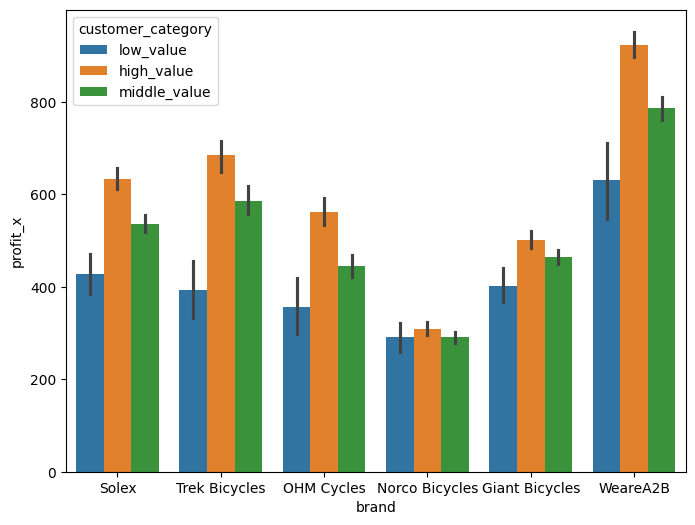

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='brand', y = 'profit_x',hue='customer_category',data=df_all)

<Axes: xlabel='brand', ylabel='age'>

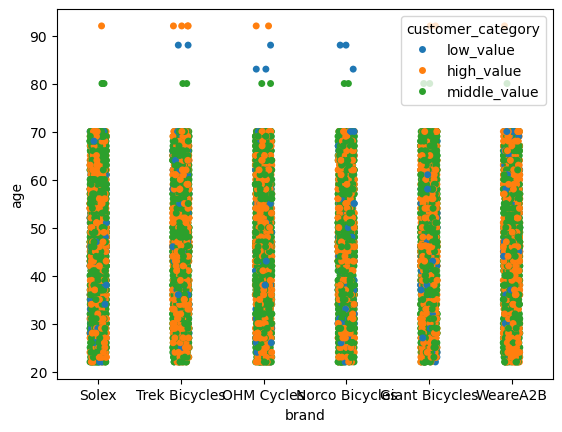

In [ ]:
sns.stripplot(x='brand', y = 'age',hue='customer_category',data=df_all)

In [ ]:
df_merge_48 = df_48.merge(df_merge[['customer_id','customer_category']], how='left', on='customer_id')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'WeareA2B'),
  Text(1, 0, 'Trek Bicycles'),
  Text(2, 0, 'Giant Bicycles'),
  Text(3, 0, 'OHM Cycles'),
  Text(4, 0, 'Solex'),
  Text(5, 0, 'Norco Bicycles')])

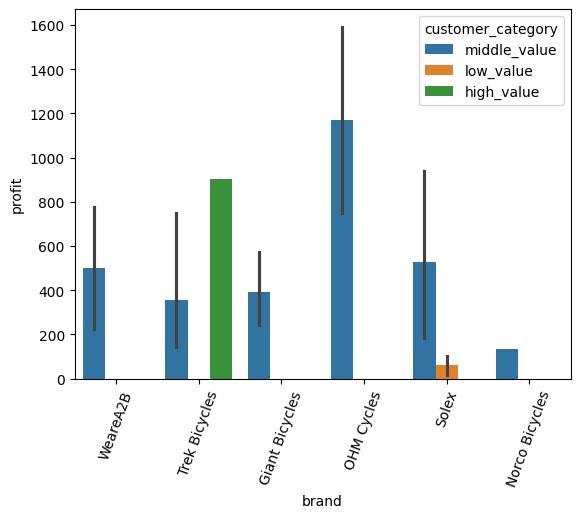

In [ ]:
sns.barplot(x='brand', y='profit',hue='customer_category', data=df_merge_48)
plt.xticks(rotation=70)


In [ ]:
df_merge_31= df_31.merge(df_merge[['customer_id','customer_category']], how='left', on='customer_id')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Solex'),
  Text(1, 0, 'WeareA2B'),
  Text(2, 0, 'Norco Bicycles'),
  Text(3, 0, 'OHM Cycles'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'Trek Bicycles')])

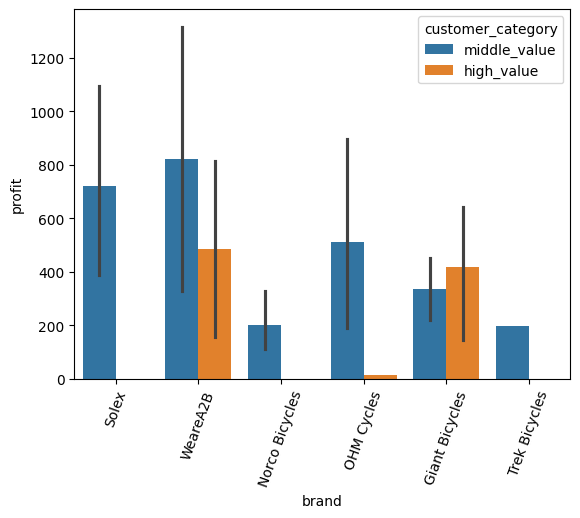

In [ ]:
sns.barplot(x='brand', y='profit',hue='customer_category', data=df_merge_31)
plt.xticks(rotation=70)
# comparing to the above figure, we can find there is no low_value customer category.